In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
data = pd.read_csv('./dataset/3.Employee_rentation/Employee_Rentation.csv')
data = data.drop(columns=['Unnamed: 0'])

In [88]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [89]:
data['employee_id'].unique()
len(data['employee_id'].unique())

24702

- each row is unique, ie. no employee left and came back

In [90]:
print(data['company_id'].unique())
print(len(data['company_id'].unique()))

[ 7  4  2  9  1  6 10  5  3  8 11 12]
12


In [93]:
data

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1
...,...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaN,0
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaN,0
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23,1
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,1


- 12 companies (id:1~12)

In [96]:
data['quit_date'] = data['quit_date'].fillna('2015-12-14')
data['churn'] = data['quit_date'].apply(lambda x: 0 if x == '2015-12-14' else 1)

data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])
data['working_days'] = (data['quit_date'] - data['join_date']).dt.days

In [97]:
data

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn,working_days
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,585
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,340
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-14,0,427
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,389
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1040
...,...,...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,2015-12-14,0,299
24698,590087.0,4,engineer,10,160000.0,2015-10-26,2015-12-14,0,49
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23,1,780
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,1,1123


## ML model

In [99]:
data_model = data.drop(columns=['employee_id', 'quit_date'])
data_model['churn_cate'] = data_model['churn'].apply(lambda x: 'yes' if x == 1 else 'no')

In [39]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [102]:
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /home/wei-chih/.local/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwklfykc_
  JVM stdout: /tmp/tmpwklfykc_/h2o_wei_chih_started_from_python.out
  JVM stderr: /tmp/tmpwklfykc_/h2o_wei_chih_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_wei_chih_tyobqa
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.770 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [104]:
h2o_df = H2OFrame(data_model)
h2o_df.summary()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/tmp/ipykernel_34205/3343542628.py:2: H2ODeprecationWarning: ``summary()`` is deprecated, please use ``show_summary()`` or ``get_summary()`` instead
  h2o_df.summary()


,company_id,dept,seniority,salary,join_date,churn,working_days,churn_cate
type,int,enum,int,int,time,int,int,enum
mins,1.0,,1.0,17000.0,1295827200000.0,0.0,4.0,
mean,3.426969476155781,,14.127803416727366,138183.34547809843,1372498777556.4734,0.5469192777912719,574.7721641972291,
maxs,12.0,,99.0,408000.0,1449705600000.0,1.0,1778.0,
sigma,2.7000109677072097,,8.089519596306804,76058.18457287704,44439198685.29434,0.497803789958076,361.5334724642805,
zeros,0,,0,0,0,11192,0,
missing,0,0,0,0,0,0,0,0
0,7.0,customer_service,28.0,89000.0,2014-03-24 00:00:00,1.0,585.0,yes
1,7.0,marketing,20.0,183000.0,2013-04-29 00:00:00,1.0,340.0,yes
2,4.0,marketing,14.0,101000.0,2014-10-13 00:00:00,0.0,427.0,no


In [105]:
strat_split = h2o_df['churn_cate'].stratified_split(test_frac=0.25, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

features = ['company_id', 'dept', 'seniority', 'salary', 'join_date', 'working_days']
target = 'churn_cate'

In [106]:
# random forest
model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=20, mtries=-1, seed=42, score_each_iteration=True)
model.train(x=features, y=target, training_frame=train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1731366622078_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         2.82019e+06            20           20           20            1775          2731          2243.18

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.08629610160165498
RMSE: 0.2937619812052863
LogLoss: 0.29231053629757164
Mean Per-Class Error: 0.09389012937667929
AUC: 0.9673797925395824
AUCPR: 0.9667303108189615
Gini: 0.9347595850791648

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5729469828049897
       no    yes    Error    Rate
-----  ----  -----  -------  ----------------
no     9096  1040   0.1026   (1040.0/10136.0)
yes    863   9269   0.0852   (863.0/10132.0)
Total  9959  10309  0.0939   (1903.0/20268.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.572947     0.906903  195
max f2                       0.426942     0.935014  245
max f0point5                 0.674197     0.915682  156
max accuracy                 0.572947     0.906108  195
max precision                0.997692     1         0
max recall                   0.009461     1         396
max specificity              0.997692     1         0
max absolute_mcc             0.572947     0.812341  195
max min_per_class_accuracy   0.582414     0.905091  190
max mean_per_class_accuracy  0.572947     0.90611   195
max tns                      0.997692     10136     0
max fns                      0.997692     10111     0
max fps                      2.82428e-06  10136     399
max tps                      0.009461     10132     396
max tnr                      0.997692     1         0
max fnr                      0.997692     0.997927  0
max fpr                      2.82428e-06  1         399
max tpr                      0.009461     1         396

Gains/Lift Table: Avg response rate: 49.99 %, avg score: 51.66 %
group    cumulative_data_fraction    lower_threshold    lift         cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100158                   0.977553           2.00039      2.00039            1                0.985746     1                           0.985746            0.0200355       0.0200355                  100.039   100.039            0.0200355
2        0.0200316                   0.967672           1.99054      1.99547            0.995074         0.972181     0.997537                    0.978964            0.0199368       0.0399724                  99.0541   99.5468            0.0398737
3        0.0300474                   0.960525           2.00039      1.99711            1                0.964087     0.998358                    0.974005            0.0200355       0.0600079                  100.039   99.711             0.0599092
4        0.0400138                   0.954768           2.00039      1.99793            1                0.957482     0.998767                    0.969889            0.0199368       0.0799447                  100.039   99.7928            0.0798461
5        0.0500296                   0.949367           2.00039      1.99842            1               

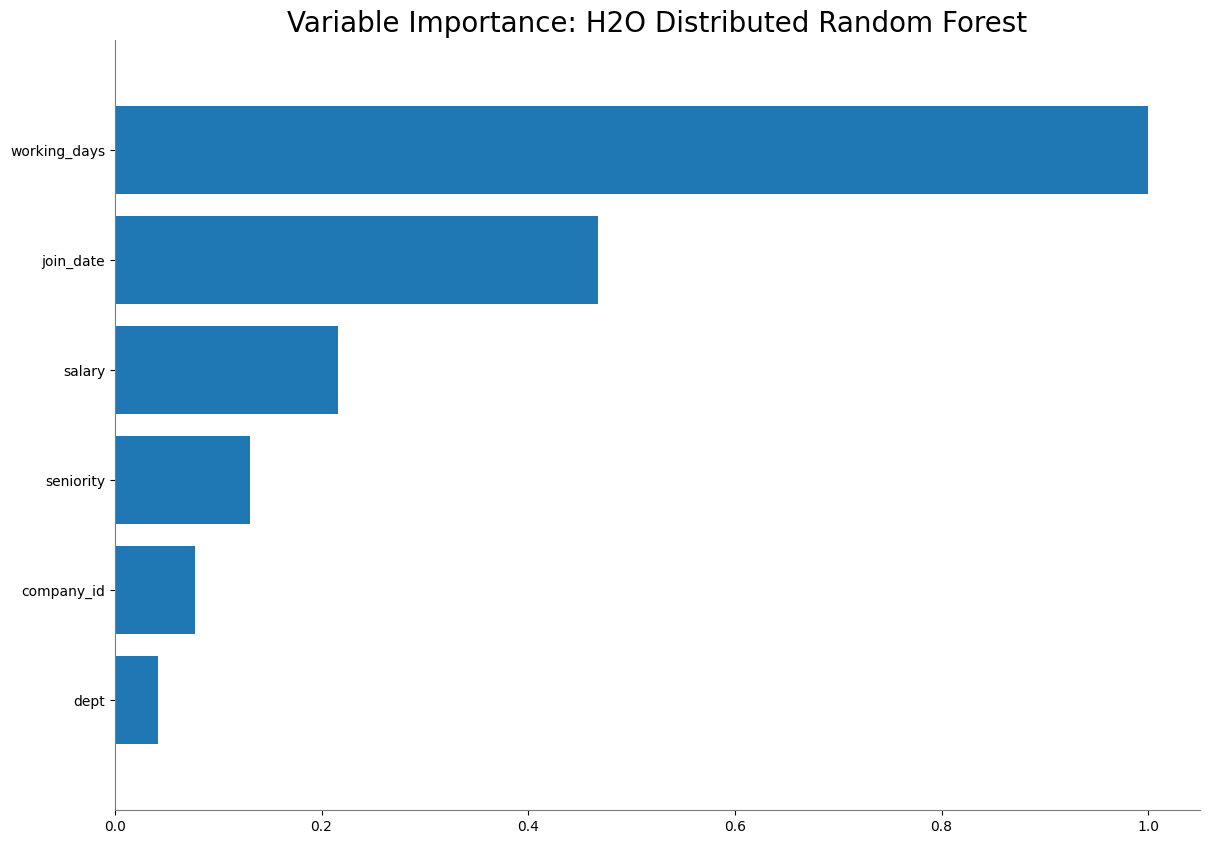

<Figure size 640x480 with 0 Axes>

In [107]:
model.varimp_plot();

PartialDependencePlot progress: |

████████████████████████████████████████████████| (done) 100%


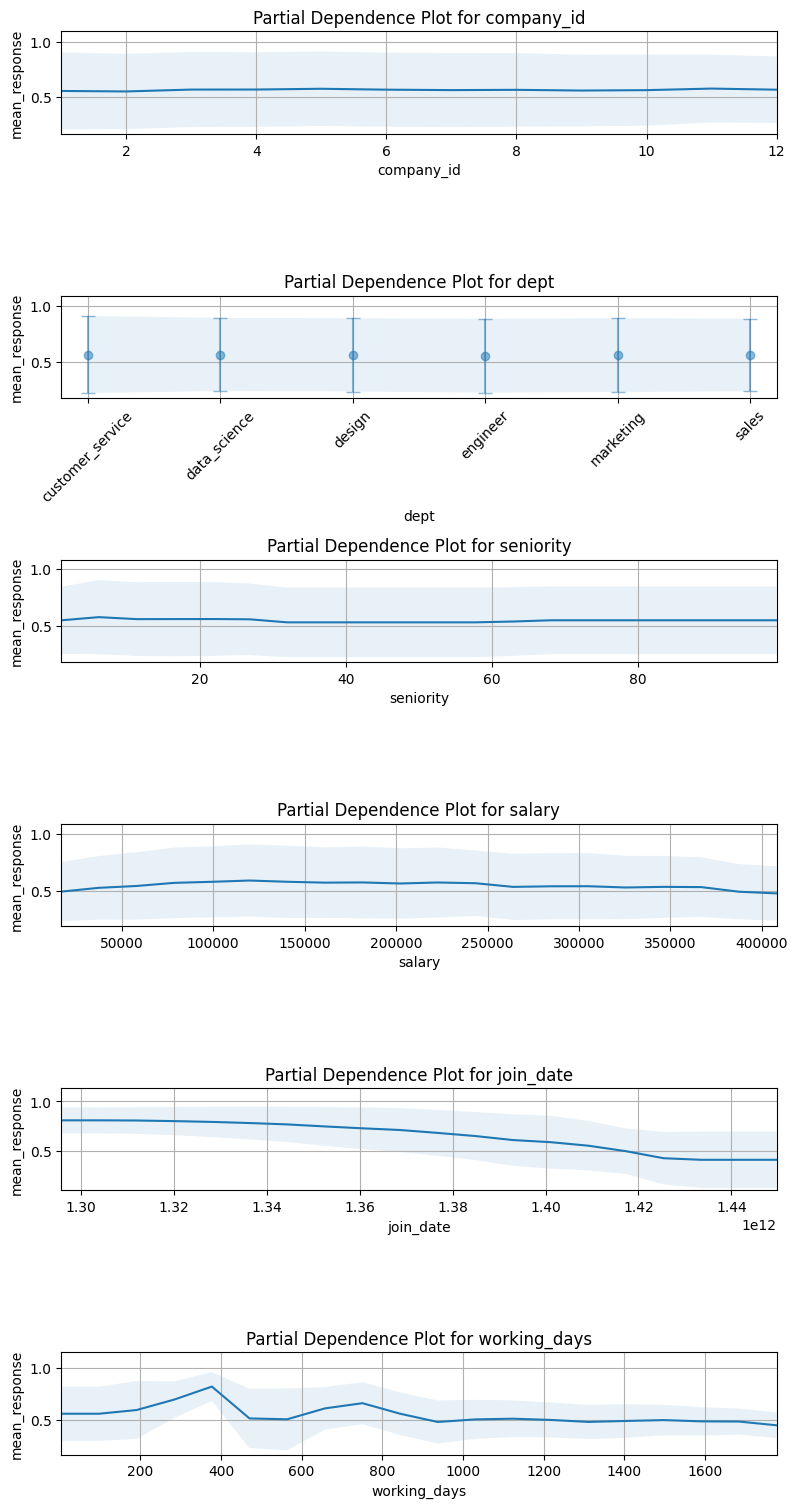

In [108]:
model.partial_plot(train, cols=features, figsize=(8, 15));

In [109]:
data_model

,company_id,dept,seniority,salary,join_date,churn,working_days,churn_cate
0,7,customer_service,28,89000.0,2014-03-24,1,585,yes
1,7,marketing,20,183000.0,2013-04-29,1,340,yes
2,4,marketing,14,101000.0,2014-10-13,0,427,no
3,7,customer_service,20,115000.0,2012-05-14,1,389,yes
4,2,data_science,23,276000.0,2011-10-17,1,1040,yes
...,...,...,...,...,...,...,...,...
24697,3,customer_service,16,97000.0,2015-02-18,0,299,no
24698,4,engineer,10,160000.0,2015-10-26,0,49,no
24699,4,customer_service,11,67000.0,2013-09-03,1,780,yes
24700,10,engineer,98,266000.0,2011-12-13,1,1123,yes


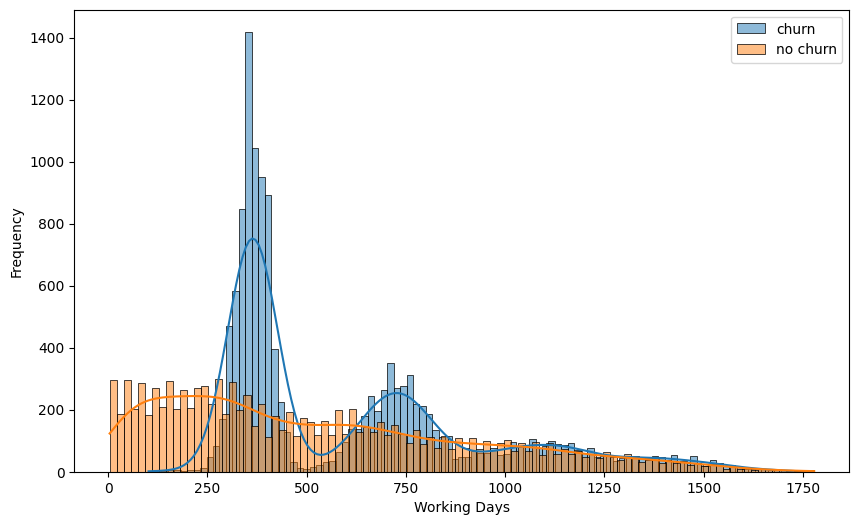

In [121]:
# plot histogram of working days
plt.figure(figsize=(10, 6))

data_model_churn = data_model[data_model['churn'] == 1]
data_model_no_churn = data_model[data_model['churn'] == 0]

sns.histplot(data_model_churn['working_days'], bins=100, kde=True, label='churn')
sns.histplot(data_model_no_churn['working_days'], bins=100, kde=True, label='no churn')
plt.xlabel('Working Days')
plt.ylabel('Frequency')
plt.legend()
plt.show()

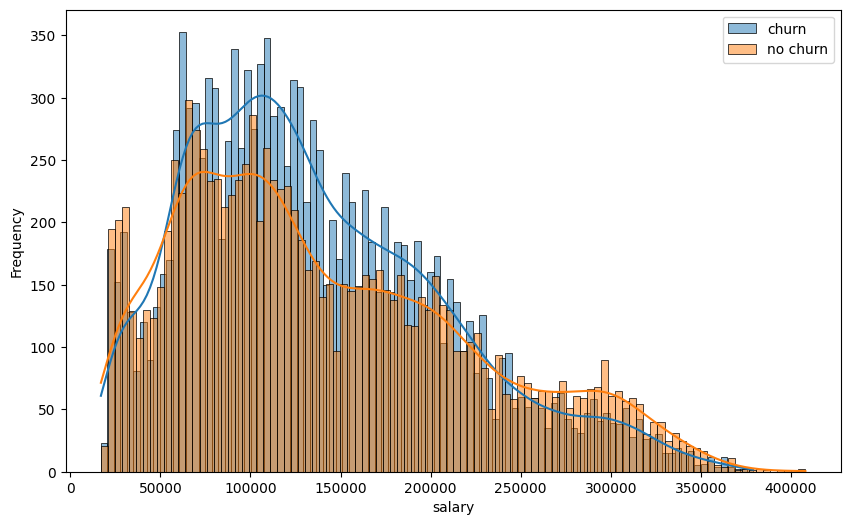

In [122]:
plt.figure(figsize=(10, 6))

data_model_churn = data_model[data_model['churn'] == 1]
data_model_no_churn = data_model[data_model['churn'] == 0]

sns.histplot(data_model_churn['salary'], bins=100, kde=True, label='churn')
sns.histplot(data_model_no_churn['salary'], bins=100, kde=True, label='no churn')
plt.xlabel('salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

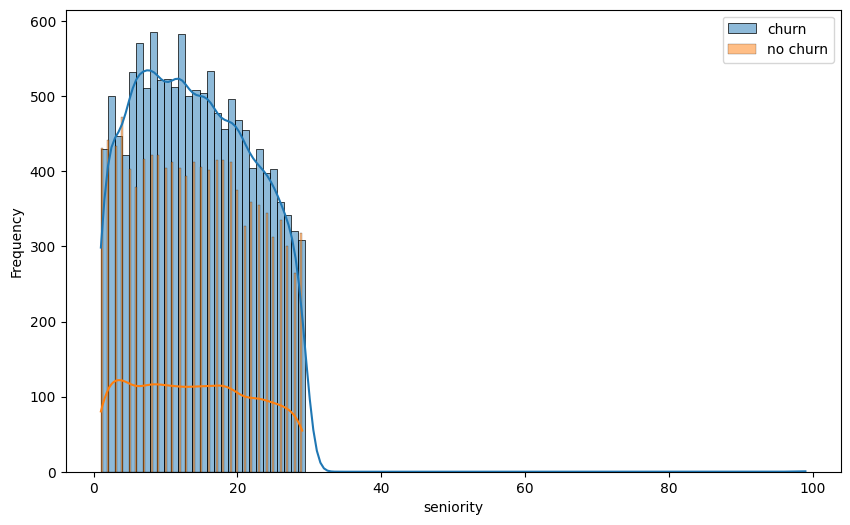

In [123]:
plt.figure(figsize=(10, 6))

data_model_churn = data_model[data_model['churn'] == 1]
data_model_no_churn = data_model[data_model['churn'] == 0]

sns.histplot(data_model_churn['seniority'], bins=100, kde=True, label='churn')
sns.histplot(data_model_no_churn['seniority'], bins=100, kde=True, label='no churn')
plt.xlabel('seniority')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
h2o.cluster().shutdown()